In [1]:
from Quadratics import FindPolynomial as FP
import numpy as np
import matplotlib.pyplot as plt

<h1> 2D Example </h1>

Let's start off with an example! Assume the 2d cubic, $$y = a^3 + 2a^2 - 5a^1 + 4a^0$$ 
passing through the points $(0, 4), (1, 2), (-1, 10), (2,10)$.

The equation for this can be found using the following code:

In [2]:
input_vals = np.array([[0], [1], [-1], [2]])
output = np.array([[4], [2],[10], [10]])
FP.find_equation_Human(input_vals, output)

'+ 1.0  + 2.0  - 5.0  + 4.0 a⁰ '

Graphing the equation and points with `matplotlib.pyplot` yields the following:

(4, 4)
(4, 1)


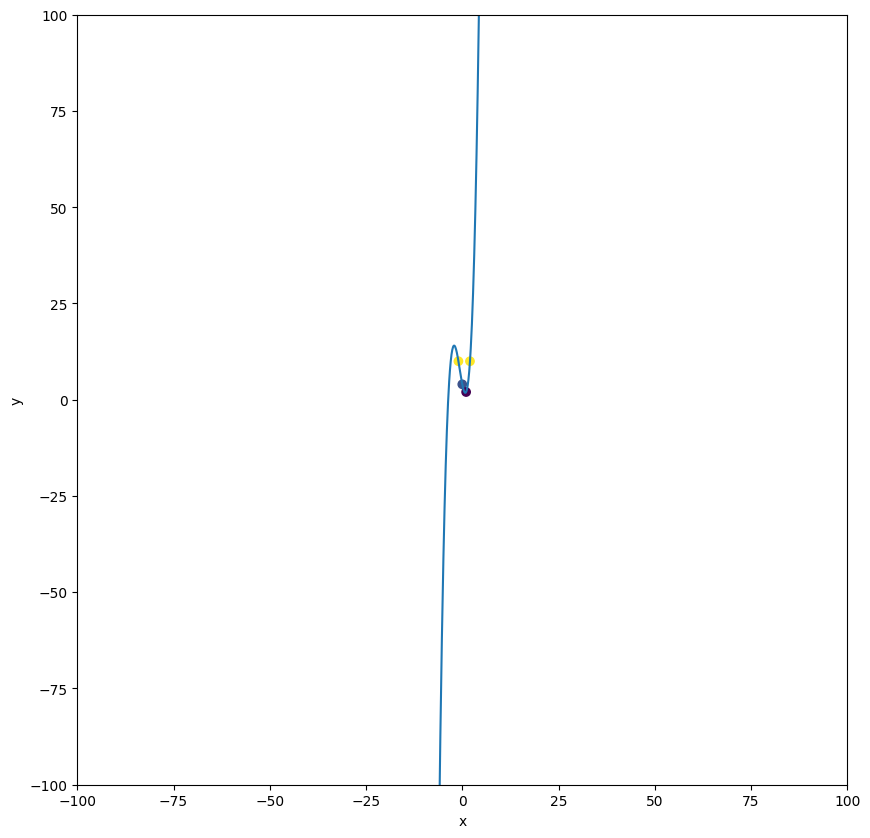

In [3]:
answers = FP.find_equation(input_vals, output)
FP.find2dEquation(input_vals, output, answers)

<h1> 3D Example </h1>

Now for a 3D Example.
Suppose the equation we want to find is: $$ z = x^2 - y^2 + 1 $$ And it passes through the points: $$(0, 0, 1), \\ (1, 1, 1), \\ (-1, -1, 1), \\ (1, 2, -2), \\ (2, 1, 4), \\ (0, 1, 0), \\ (0, 2, -3), \\ (3, 3, 1), \\ (3, 2, 6)$$

In [4]:
input_vals = np.array([[0, 0], [1, 1], [-1, -1], [1, 2], [2, 1], [0, 1], [0, 2], [3, 3], [3, 2]])
output = np.array([    [1],     [1],     [1],     [-2],    [4],    [0],    [-3],   [1],    [6]])

FP.find_equation_Human(input_vals, output)

'+ 1.0  - 1.0  + 1.0 a⁰b⁰ '

a = x, b = y, c = z, etc.

In [5]:
#checking our work-> 0 means they're equal
i = 0
for n in input_vals:
    print(output[i]-(n[0]**2-n[1]**2+1))
    i+=1

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


I've included a link to Desmos with the graph and the points below. Feel free to verify!
<br>

https://www.desmos.com/3d/1ab0d742ae


<h1>Diving into the Math</h1>

<b><h3> How many points? </h3>

The relationship between your equations and the amount of unique points needed is defined by: $$p_{points} = (d_{degree} + 1)^{d_{dimensions} -1}$$ where $p_{points}$ is the amount of points you need to input, $d_{degree}$ is the degree of your polynomial, and $d_{dimensions}$ is the amount of dimensions it passes through.

$p_{points}$ not only represents the amount of points you need, but also the amount of coefficients in that equation's standard form. $$y = ax^1 + bx^0$$ $$y = ax^3 + bx^2 + cx^1 + dx^0$$ In 3D, the amount of coefficients scale even more rapidly: $$z = ax^1y^1 + bx^0y^1 + cx^1y^0 + dx^0y^0$$ $$z = ax^2y^2 + bx^1y^2 + cx^0y^2 + dx^2y^1 + ex^1y^1 + fx^0y^1 + gx^2y^0 + hx^1y^0 + ix^0y^0$$
*note the cyclic nature of the exponents: $x^{2, 1, 0, 2, 1, 0, 2, 1, 0}$ and $y^{2, 2, 2, 1, 1, 1, 0, 0, 0}$

4D example: 
$$Z = ax^1y^1z^1 + bx^1y^1z^0 + cx^1y^0z^1 + dx^1y^0z^0 + ex^0y^1z^1 + fx^0y^1z^0 + gx^0y^0z^1 + hx^0y^0z^0$$

<b><h3> Matrix Multiplication </h3>

You can display the coeffecients you want to find using systems of equations and matrices. For the general quadratic $ax^2 + bx + c = y$, you need three points to get a classical system set up:
$$
\left\{ 
\begin{array}{c}
ax^2_1+bx_1+c=y_1 \\ \\
ax^2_2+bx_2+c=y_2 \\ \\
ax^2_3+bx_3+c=y_3
\end{array}
\right. 
$$

Next, all you have to do is convert this into a matrix: 
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}

From here, the math is simple:

$$
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$

$$
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = 
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}^{-1}
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$




<h3> <b> numpy's matrix operations 

numpy represents an element in a matrix as $A_{ij}$. When adding a scalar to the entire matrix, it performs $B_{ij} =  A_{ij} + c$, where $c$ is a scalar. A negative $c$ would be the same as subtraction. When dividing a matrix, you will get a new matrix such that $B_{ij} =  \frac{c}{A_{ij}}$.
Another way to view operations is as numpy broadcasting the scalar until it has the correct dimensions, and then performing the designated operation.

During exponentiation, one case is $c^A$, which will return a matrix $B_{ij}$ such that $B_{ij} = c^{A_{ij}}$. The final case is $A^C$, which will return a matrix $B_{ij}$ such that $B_{ij} = (A_{ij})^{C_{ij}}$. 


<b><h3>Code Tracing & Explaination</h3>

The main code: 
```py
main = np.ones([general, general])
for i in range(general): #equation number
  for j in range(general): #equation element
    main[i, j] = np.prod(input_vals[i, :]**(np.array(FindPolynomial.numberToBase(general-j-1, degree + 1, numVars))))
```
In this code, `main` is the coefficients matrix. When solving a linear equation using matrices, one writes the coefficient of each term in a matrix prior to inverting. Main is this matrix of coefficients, generalized to be compatible with polynomials in $\mathbb{R}^n$. `i` is the current row of the matrix, which represents the coefficients of a polynomial. `j` represents the current column, with `(i,j)` representing a specific element from the polynomial. 

`numVars` represents the number of independent variables in the equation. `degree` represents the degree of the equation. `general` represents how many terms there are in a $m$-th degree polynomial in $\mathbb{R}^n$

I realized that you can write the coefficients of a term are similar to converting the degree of that term to a different base. Take the polynomial $$z = ax^1y^1 + bx^0y^1 + cx^1y^0 + dx^0y^0$$ 
There are 4 terms. Working backwards, $a$ is the 4th term, $b$ the third, and so on. The exponents at the fourth term, $(1,1)$ are simply equal to $3$ in base 2. The exponents at the third term, $(1,0)$ are equal to 2 in base 2. The 8th term of a first degree polynomial in $\mathbb{R}^4$ has exponents $(1,1,1)$ followed by $(1,1,0)$. This corresponds to 7 and 6 in base 2 respectively. Next, the 9th term of a degree 2 polynomial in $\mathbb{R}^3$ is $(2,2)$ and the 8th term is $(2,1)$, which is 8 and 7 in base 3. A pattern insues: each time, we convert from base 10 to base degree + 1; the number we convert is the element number minus 1; we pay attention to only the first `numvars` element of the expansion. Hence, the loaded line constructs a numpy array in this fashion. When raising two numpy arrays of the same shape, the numpy power method $A^B$ raises $A_{i,j}$ to $B_{i,j}$. This ensures each input value is raised to the correct exponent. The product then multiplies all these values to get the coefficient. 


<h1>Degree Mislabelling<h1>

When inputting points from a linear equation into, say, a cubic, the program still works, giving you your desired equation. However, putting in points from a quadratic into a linear will also give you an equation, just not a quadratic. 

In [6]:
input_vals = np.array([[0],[1],[2],[3]])
output = np.array([[0],[1],[2],[3]])

FP.find_equation_Human(input_vals, output)

'+ 1.0  '

(4, 4)
(4, 1)


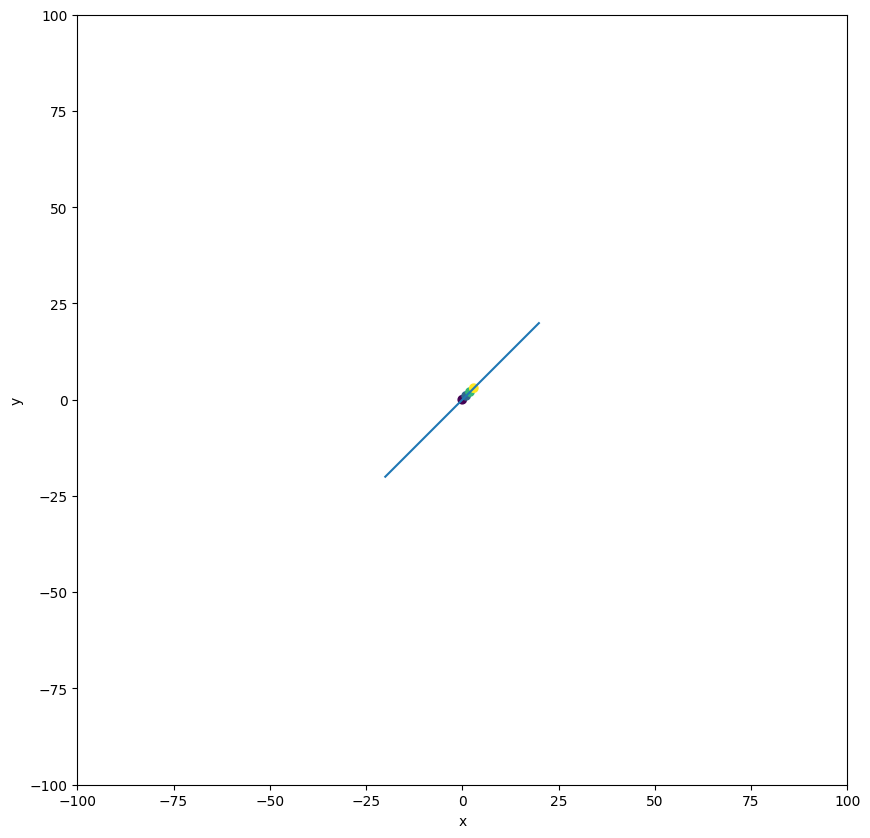

In [7]:
answers = FP.find_equation(input_vals, output)
FP.find2dEquation(input_vals, output, answers)

$$z = x + y$$
This is also true for 3D:

In [8]:
input_vals = np.array([[0, 0], [1, 0], [0, 1], [1, 1], [1, 2], [2, 1], [2, 2], [2, 3], [3, 2]])
output = np.array([[0], [1],[1],[2],[3],[3],[4],[5],[5]])

FP.find_equation_Human(input_vals, output)

'+ 1.0  + 1.0  '

In [9]:
answers = FP.find_equation(input_vals, output)


(9, 9)
(9, 1)


Desmos Link:
https://www.desmos.com/3d/gwb7bptpdq



<h1>Exceptions<h1>

Exceptions are far and few between, for the most part. However, the possibilites scale as you go into higher and higher dimensions. 

First, do not input only the zeroes of a function. You will always get a linear equation. Even one non-zero is enough to prevent this from happening.

Secondly, the program fails to work when the matrix $A$ is linearly dependent. If the input points are on an axis about which equations can rotate, it is impossible to find and equation. In 3D space, if you input points on a line, you'll get this error (a plane can be rotated about a line in 3D to get a new equation that also passes through input points.) In 4D space, you can't input coordinates on the same line, or on the same plane. In 2D space, if you input the same point multiple times, you'll get this error.

Next, inputting symmetries. Say, for example, one is in $\mathbb{R}^3$. If the points $(1, 0, 0); (-\frac{1}{2}, \frac{\sqrt{3}}{2}, 0); (-\frac{1}{2}, -\frac{\sqrt{3}}{2}, 0); (0, 0, 1)$ are input, the algorithm throws an error. The points $(-\frac{1}{2}, \frac{\sqrt{3}}{2}, 0)$ and $(-\frac{1}{2}, -\frac{\sqrt{3}}{2}, 0)$ are reflections of each other over the x axis, and lead to a singular matrix error. There is no degree 1 polynomial passes through these, though there is a degree 2 solution: $f(x, y) = 1 - x^2 - y^2$. Re-running the algorithm with more points that lie on $f(x, y) = 1 - x^2 - y^2$ that still are symmetric over axis (i.e points like $(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}, 0)$ and it's 3 other variations) did yield an answer. I cannot explain this but thought it worthy of being mentioned in this category. 

Finally, the program fails is if you give the same input multiple outputs.



If all your points fall on some (1D)$r$ in 3D space, you could rotate a plane about $r$ and still have an entirely new equation that passes through your same points. Scales to a plane in 4D, and surface in 5D. 

<h1>Experiment</h1>

With your new knowledge, feel free to clone the repository and experiment with equations.

In [10]:
#input_vals = 
#output =

#FP.find_equation_Human(input_vals, output)

<h1> Applications </h1>

The main application for this is in Machine Learning. By having a machine record the value of its neurons, and the associated cost enough times, it will be possible to find the exact cost function of the machine. Taking derivatives of the function would yield global minima. You could then surgically move the machine's inputs to the highest possible efficiency.  Of course, one limiting factor is how much input you have: if your neural network is comprised of $100$ Dense layers with $100$ neurons each, you have $10,000$ neurons total. Plugging this into our equation from before, your cost function would be $10,000$ Dimensional. Assuming the degree of your Cost function is $100$, or $200$, you would need $101^{10000}$ input and output pairs to fully predict the cost function of your algorithm. This would require terabytes, if not petabytes, of data. Though not applicable yet, a future civilization with much more computing power could run this on giant neural networks, or today's civilization could use this for smaller projects.

There is, however, a workaround to this problem. One can iteratively try to find the minima of a loss function instead. I will detail the conduct of the process for 2 dimensions, and how one would go about it in 3 or more dimensions.

A 2D Loss Function assigns one loss value to one neuron. 
First, find two different loss values for that neuron. Next, apply the above algorithm to find the equation of the line through those points. Find the zeroes of this line (algebraically or numerically). Take the zero of the line, and plug it back into the loss function. Now you have three (neuron, loss) pairs. Plug these into the algorithm to get the equation of the quadratic. This time, use it's extrema instead. 
In general, one will repeat this process. If no minima can be found, we use maxima. If no maxima can be found, we use zeroes. This function will eventually converge onto our loss function (be it a polynomial or not). The ending for the algorithm (given we will have to round numbers and there will be error) in 2D occur once calculated minima are all within a certain bound of each other. 

For 3D, one will add neuron-loss pairs to the algorithm based on the following priority: $\nabla f = 0$; most, but not all components of $\nabla f = 0$; or $f = 0$. In 3D, there will often be multiple or infinite points that satisfy these constraints. In this case, the algorithm will randomly pick points that satisfy the constraint until it has to move onto a more lax constraint or it has enough points to go again. Remember, for the 3D case, the algorithm needs to add multiple points before it can run again. 

The fun doesn't end here! This algorithm can be used for modelling systems in physics too. One can create an approximate surface for calculating flux by inputting coordinates in $\mathbb{R}^3$. One can approximate scalar fields, such as the temperature of a closed room, by inputting various points in $\mathbb{R}^4$: 3 Coordinates and 1 corresponding temperature. Through such methods, one can calculate flux through arbitrary surfaces, or quickly find the temperature of a point in a room without solving the heat equations. 




Here is an example of the function minimizing loss given $L(x) = \frac{x^2}{2} + 20sin(x)$
<br>
If it throws an error, reload it. There's a degree of randomness involved, so the program may have randomly loaded the same point twice leading to a singular matrix error. 


(3, 3)
(3, 1)


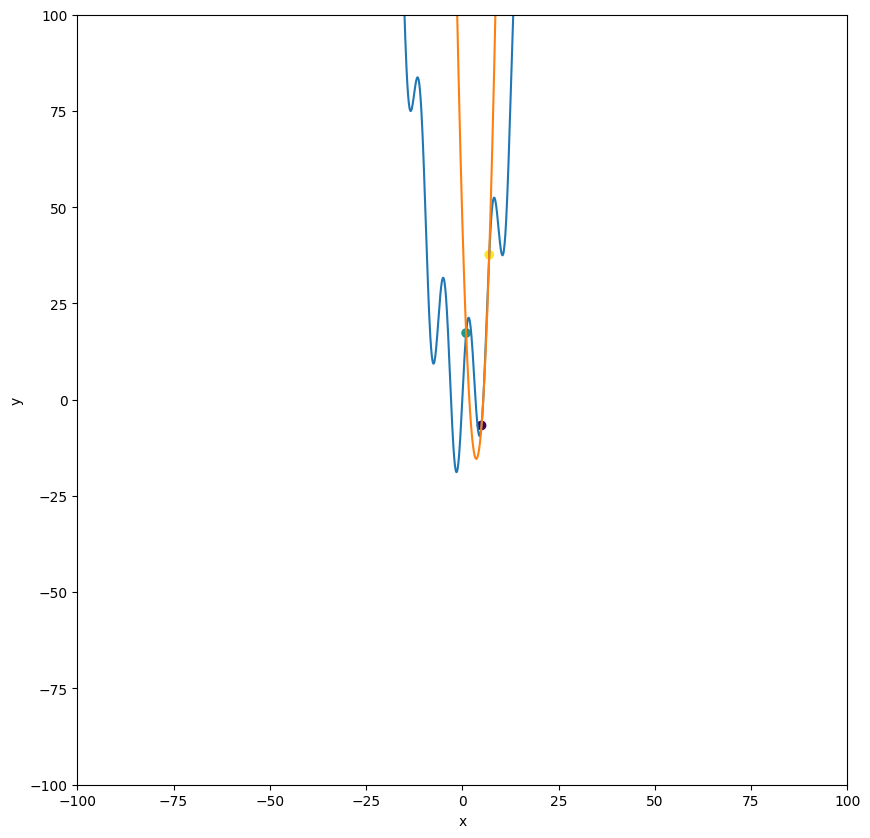

(4, 4)
(4, 1)


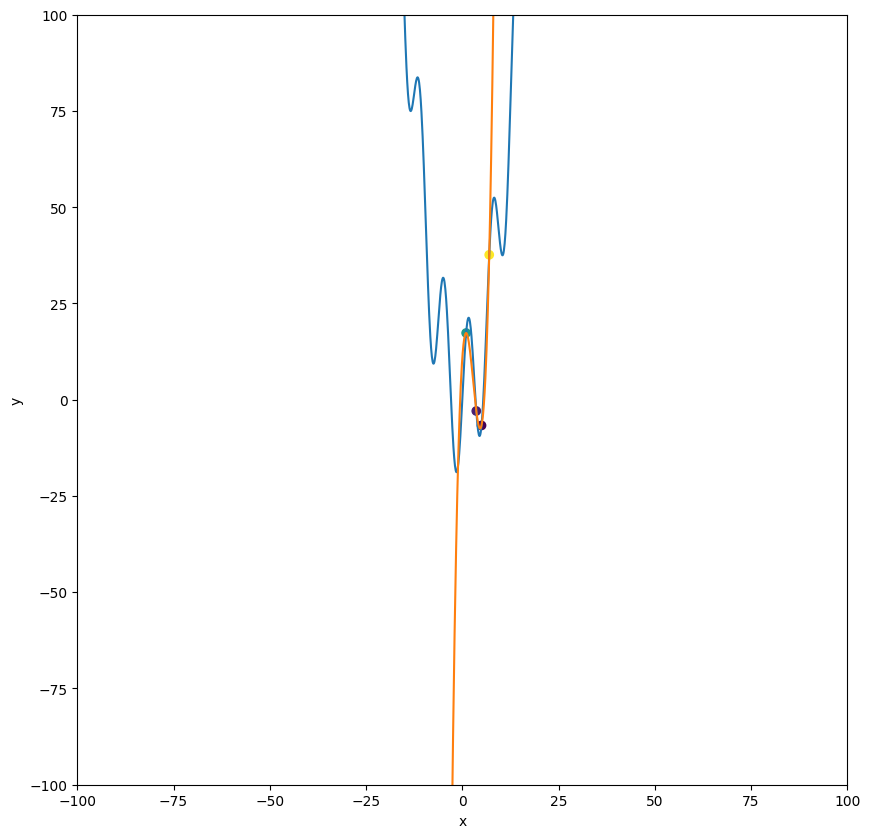

(5, 5)
(5, 1)


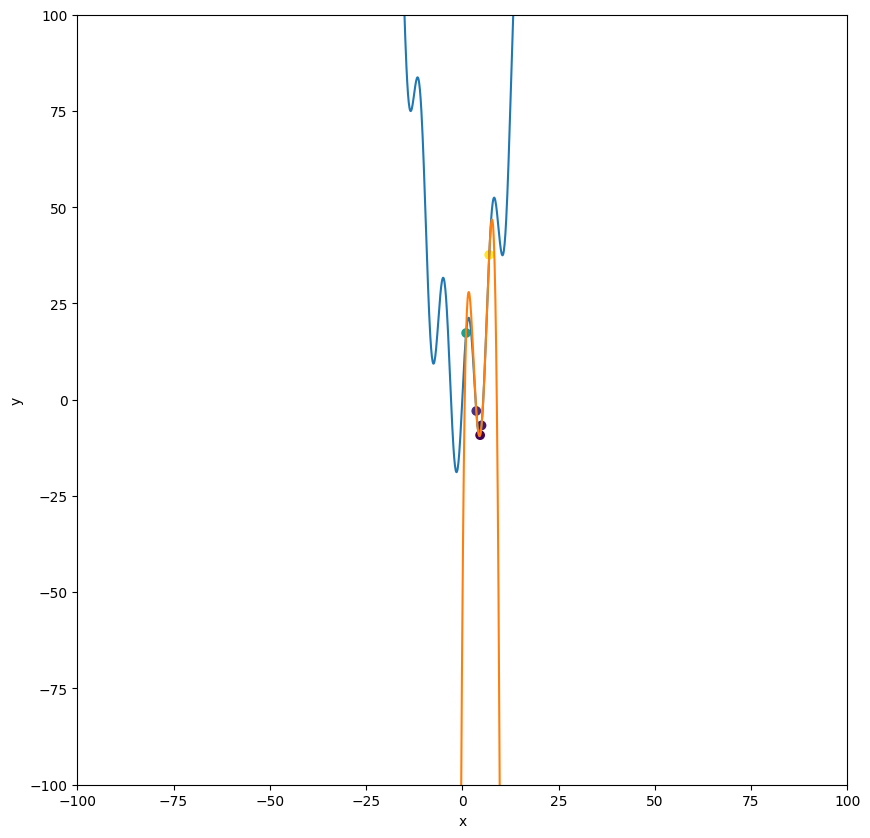

(6, 6)
(6, 1)


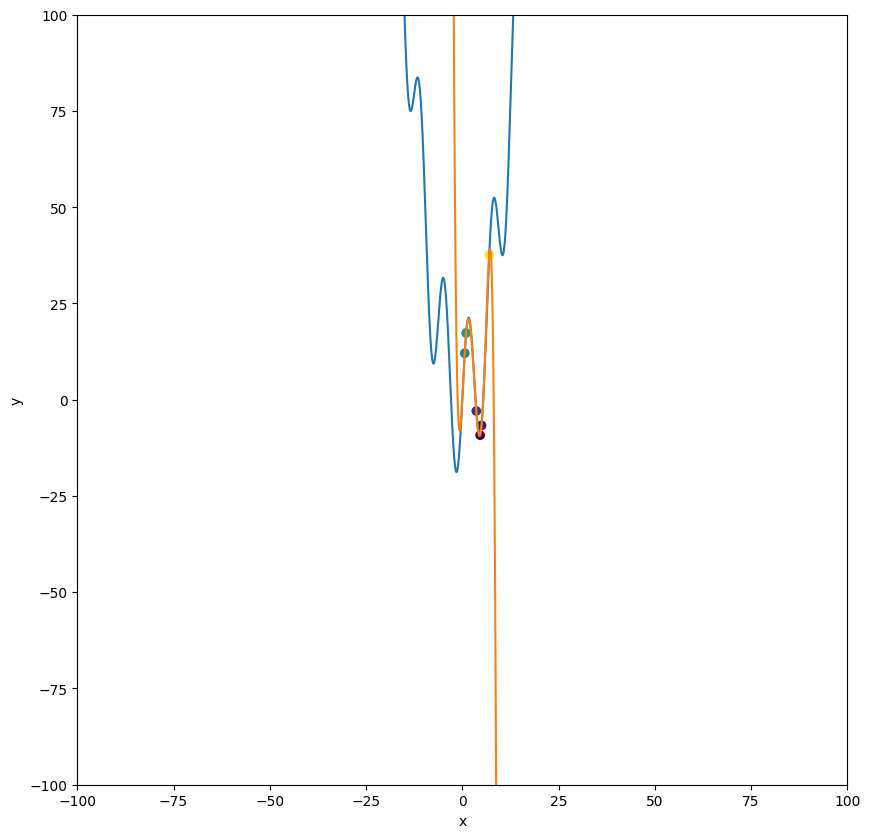

(7, 7)
(7, 1)


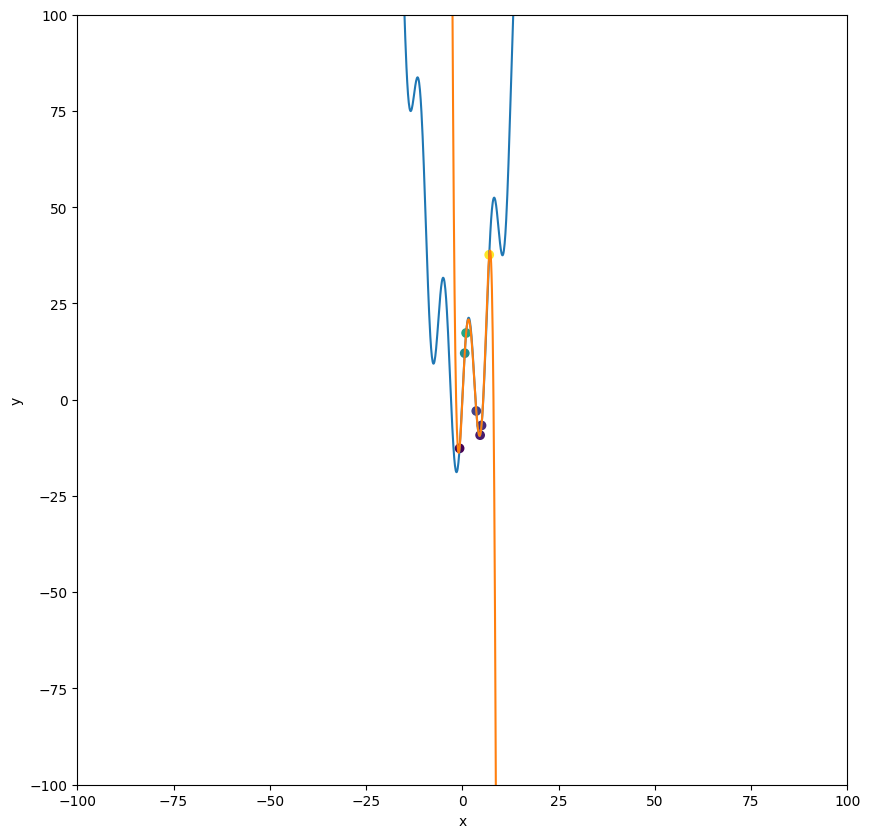

(8, 8)
(8, 1)


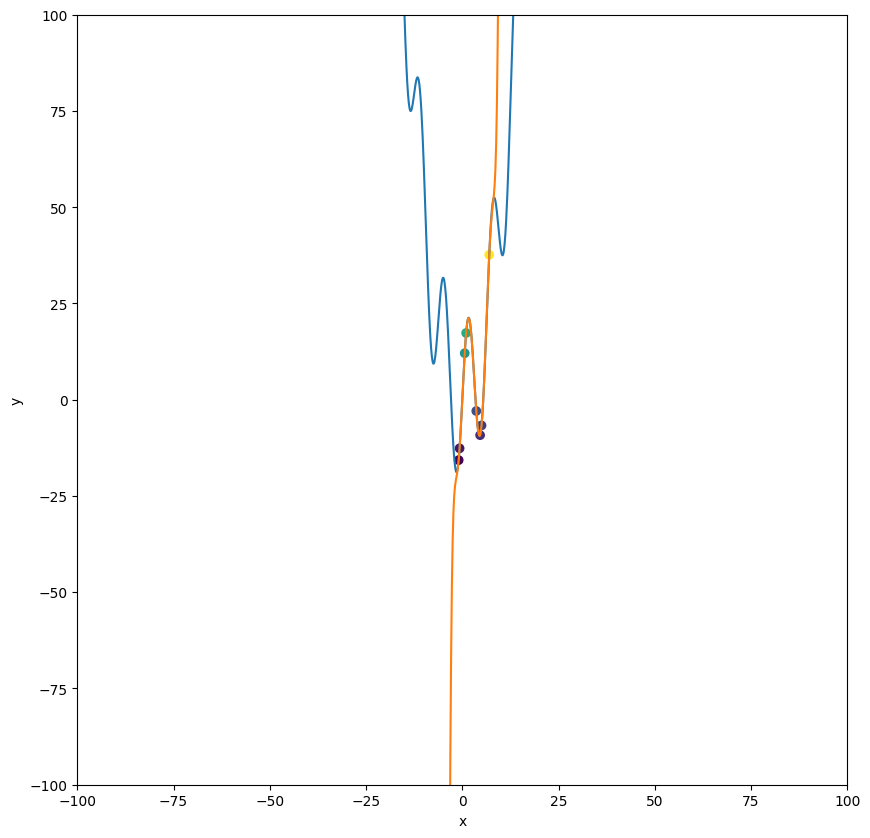

(9, 9)
(9, 1)


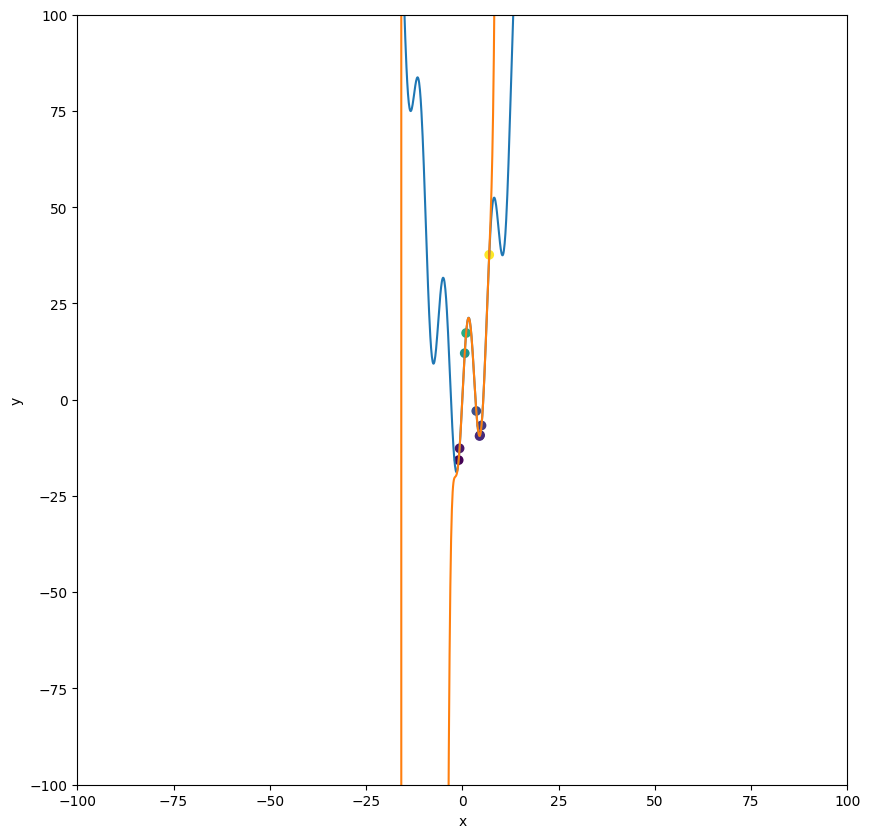

(10, 10)
(10, 1)


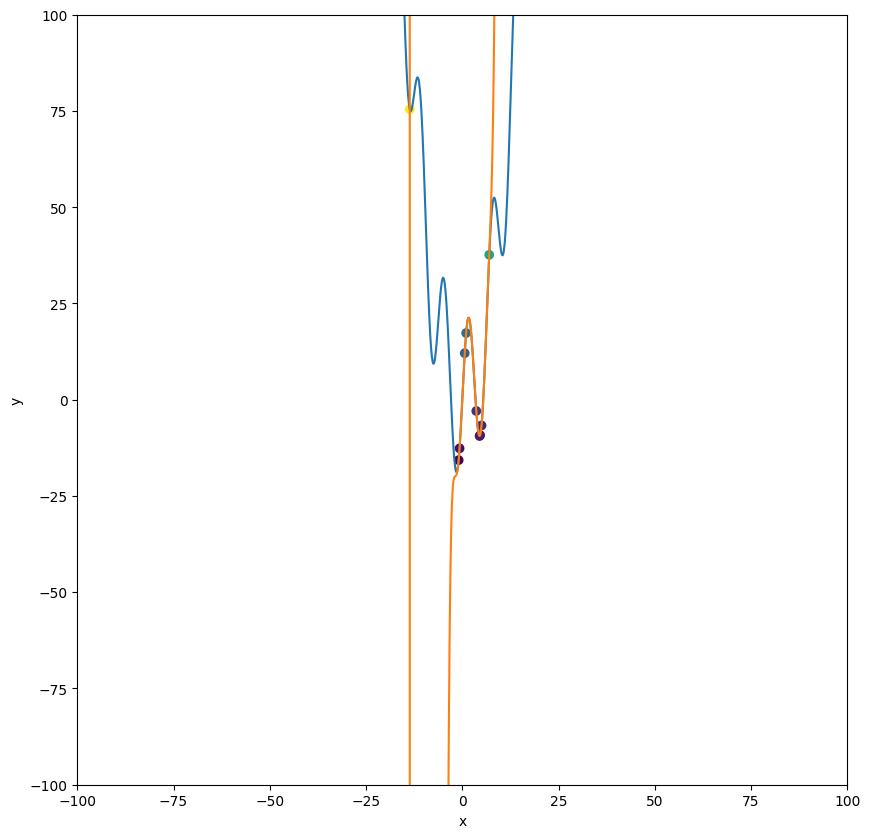

(11, 11)
(11, 1)


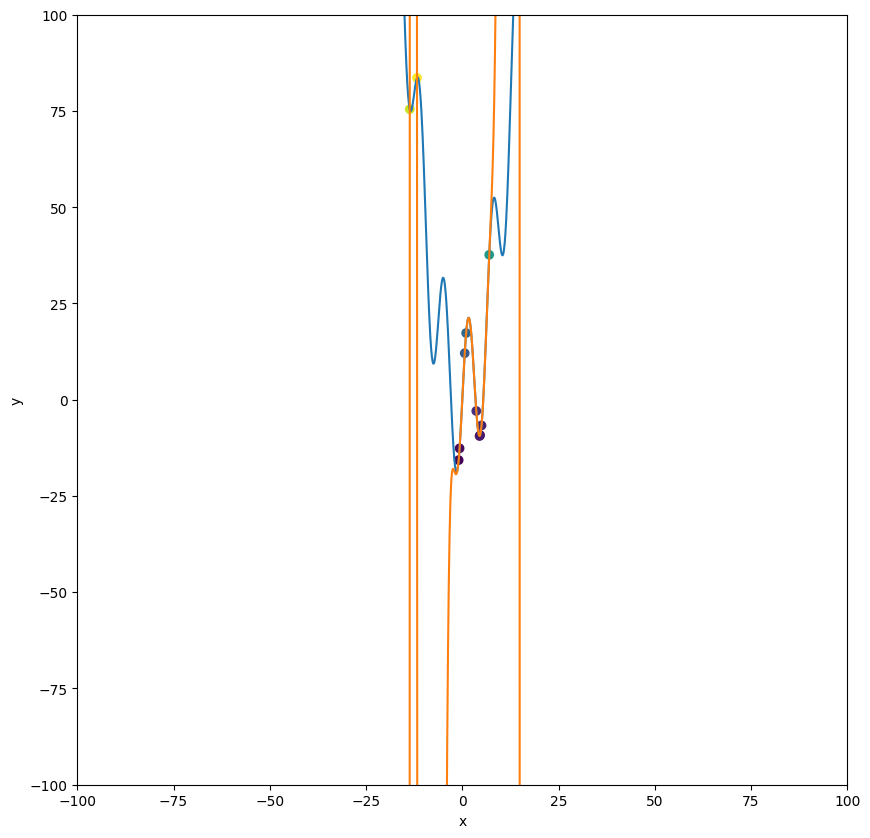

(12, 12)
(12, 1)


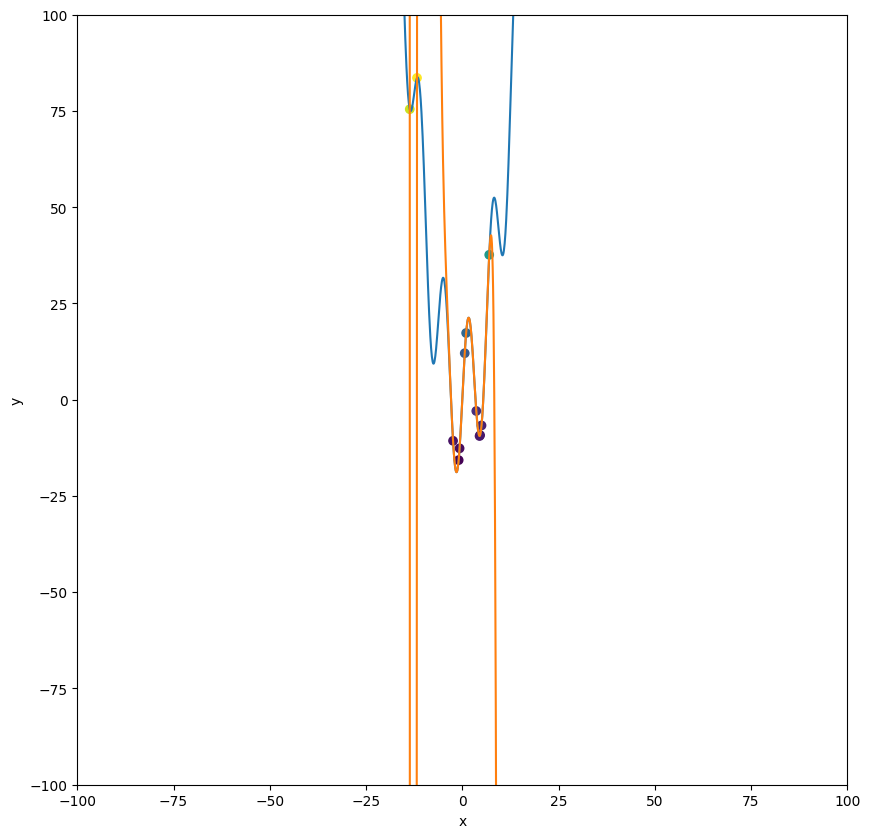

' minimum value found: [np.float64(-15.686606457282842)]'

In [11]:
FP.iterativeMinimize2DExample1()

Here is $L(x) = x^{6}-2x^{4}+x^{3}-x^{2}-x+2\sin\left(5x\right)$<br> Again, you may have to reload this for it to work. I am still refining this code. 

(3, 3)
(3, 1)


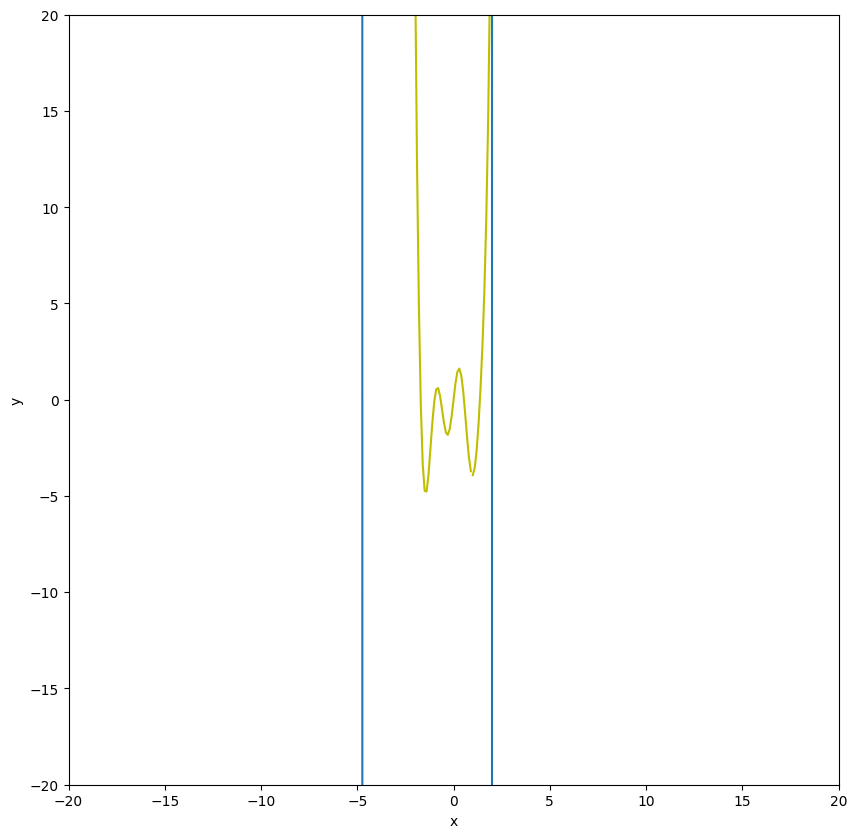

(4, 4)
(4, 1)


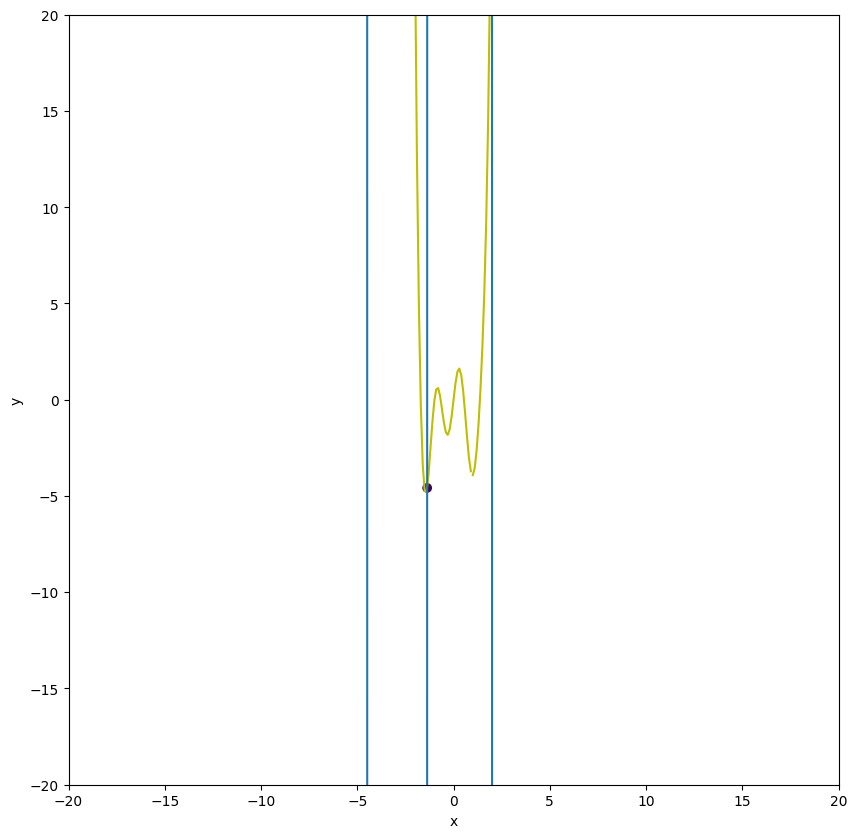

(5, 5)
(5, 1)


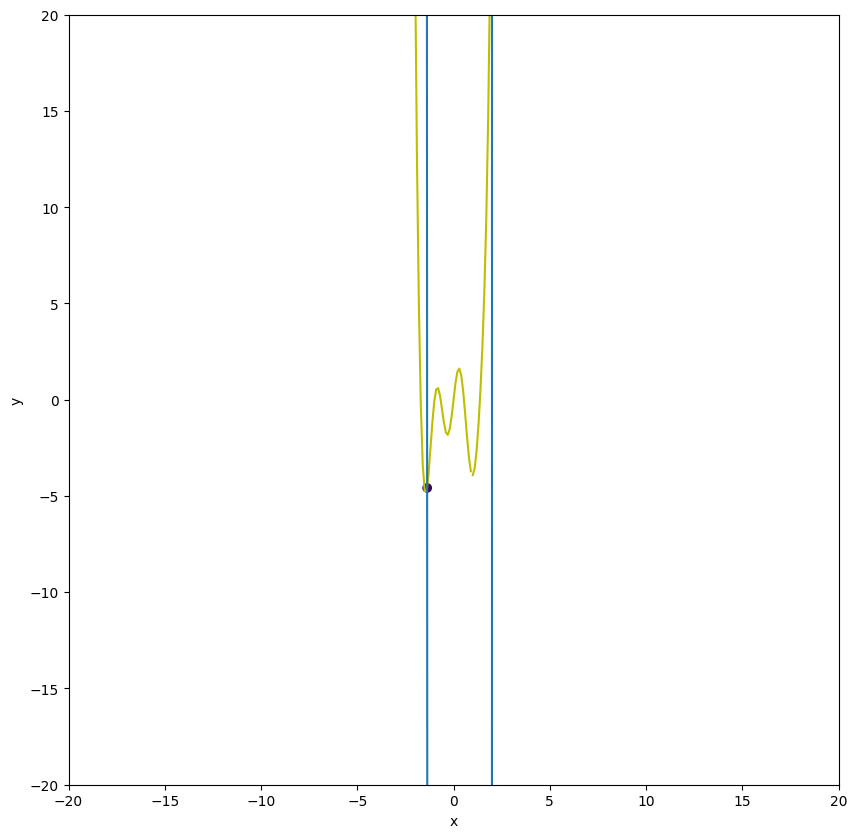

(6, 6)
(6, 1)


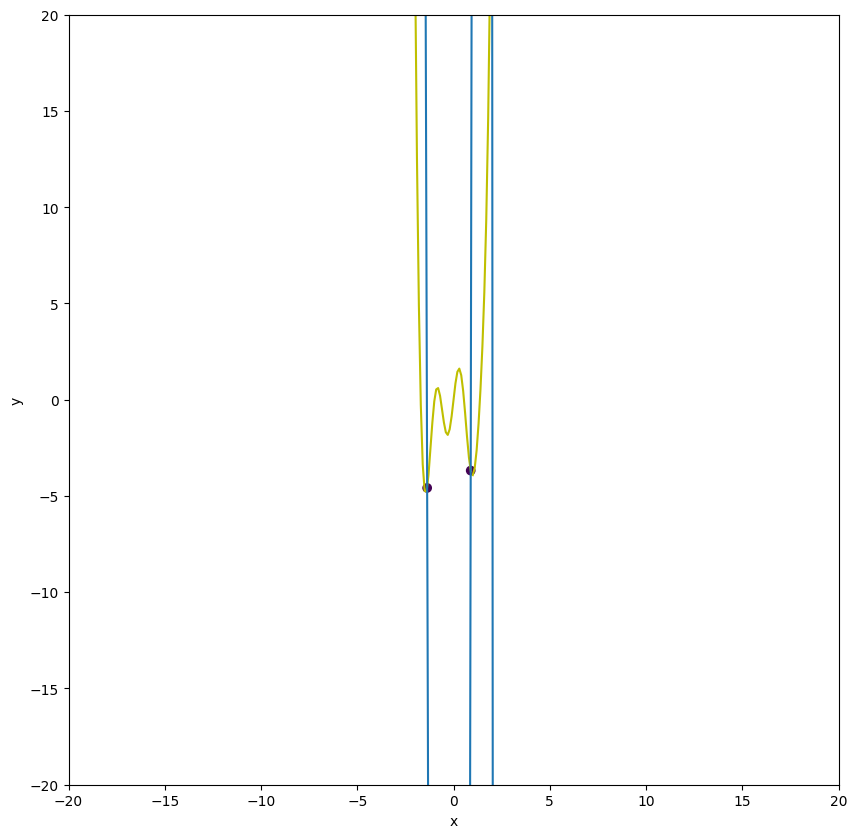

(7, 7)
(7, 1)


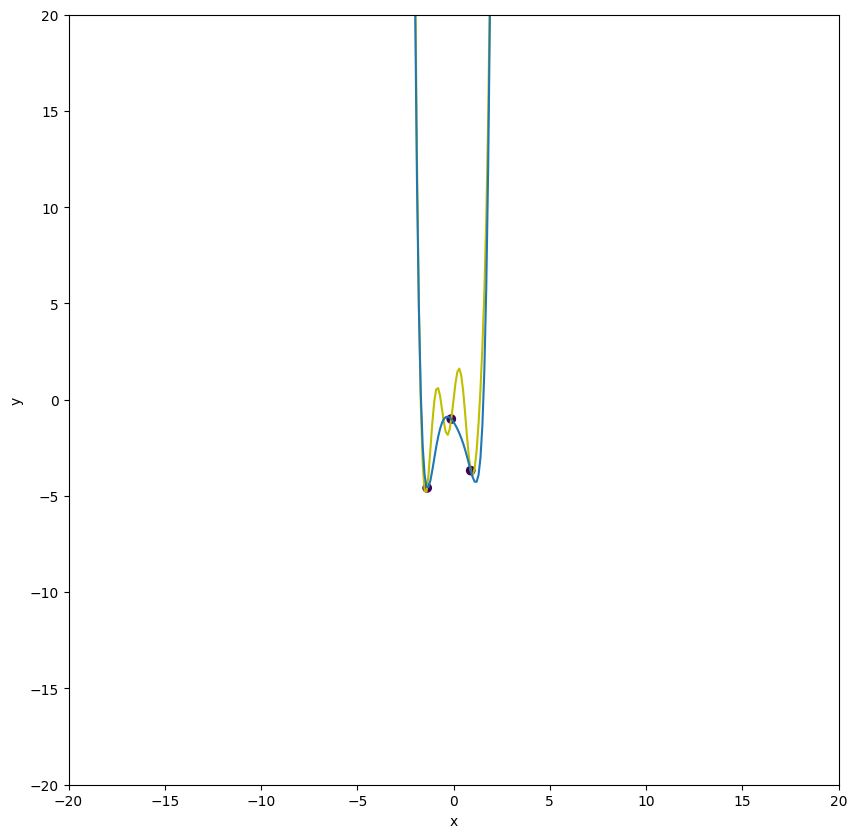

(8, 8)
(8, 1)


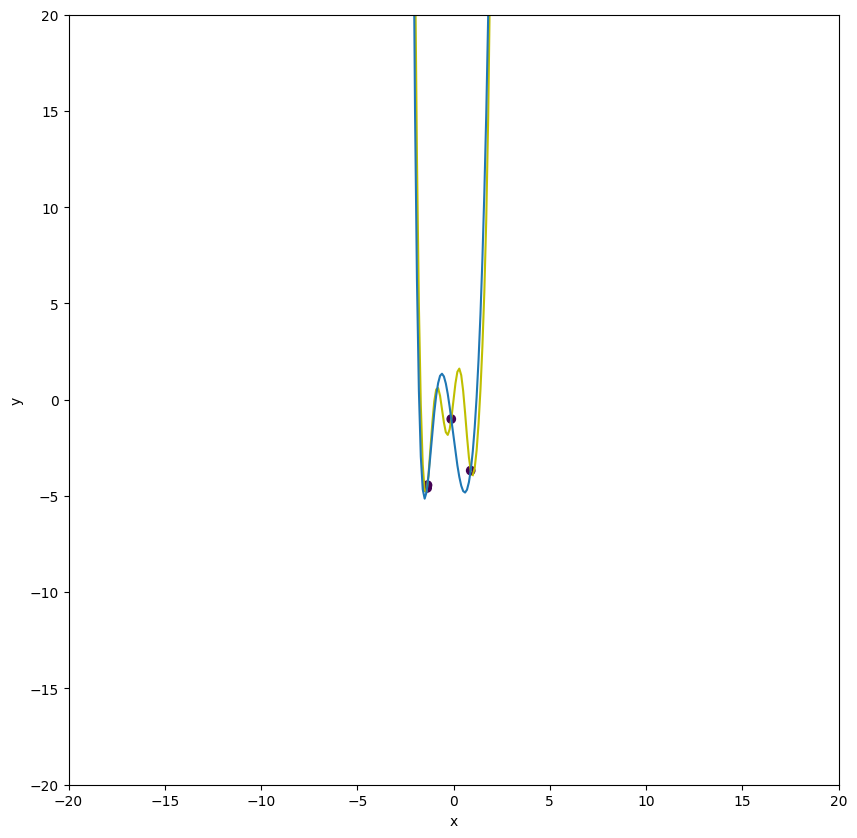

(9, 9)
(9, 1)


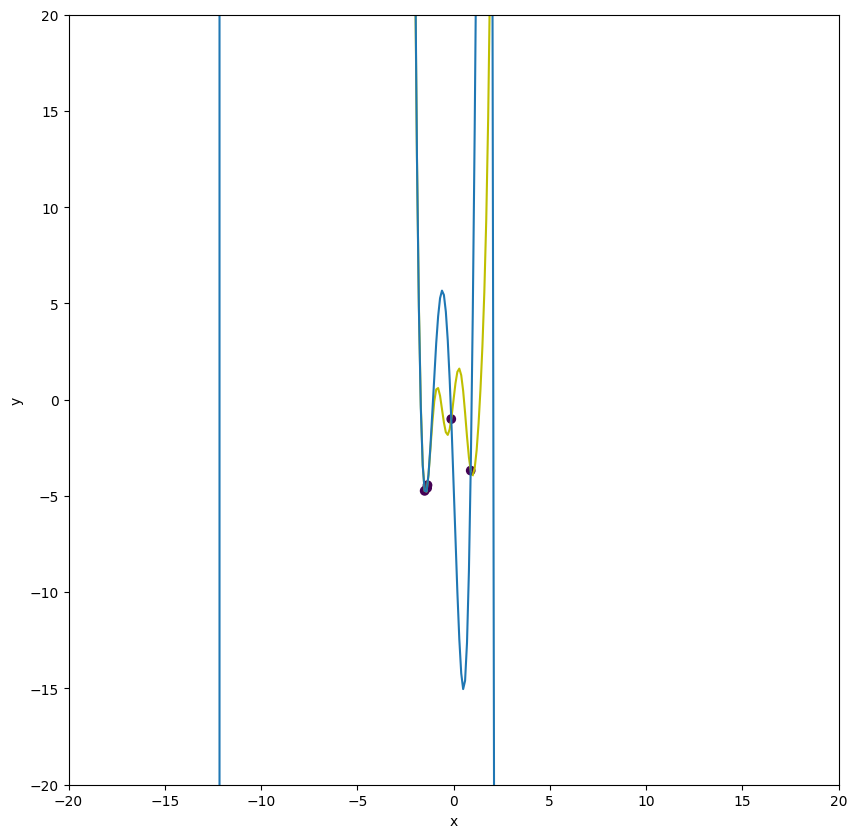

(10, 10)
(10, 1)


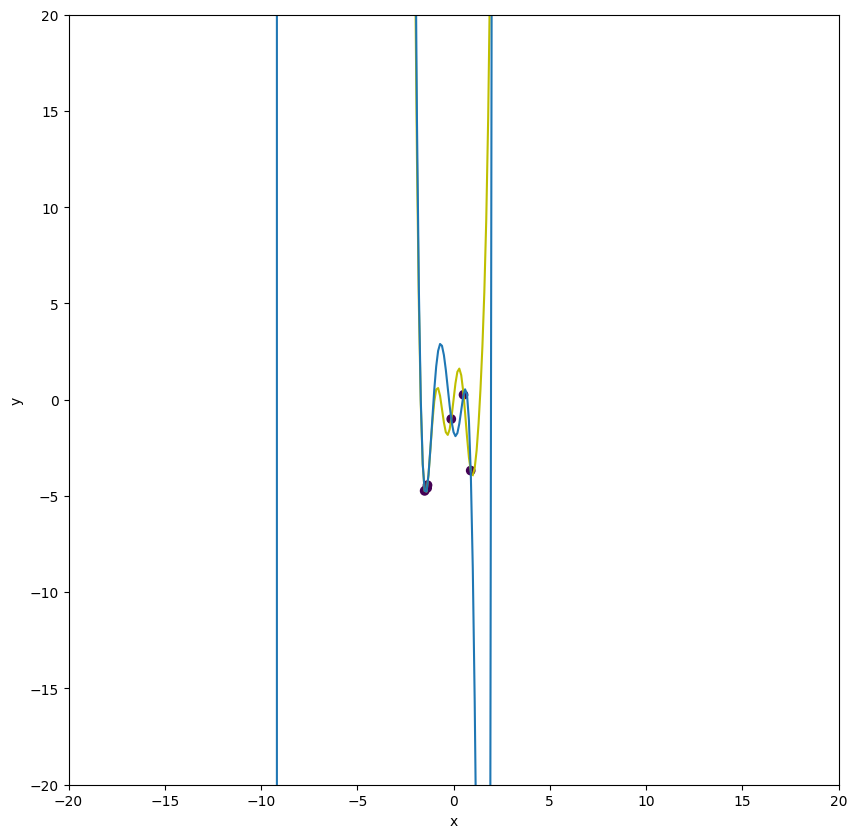

(11, 11)
(11, 1)


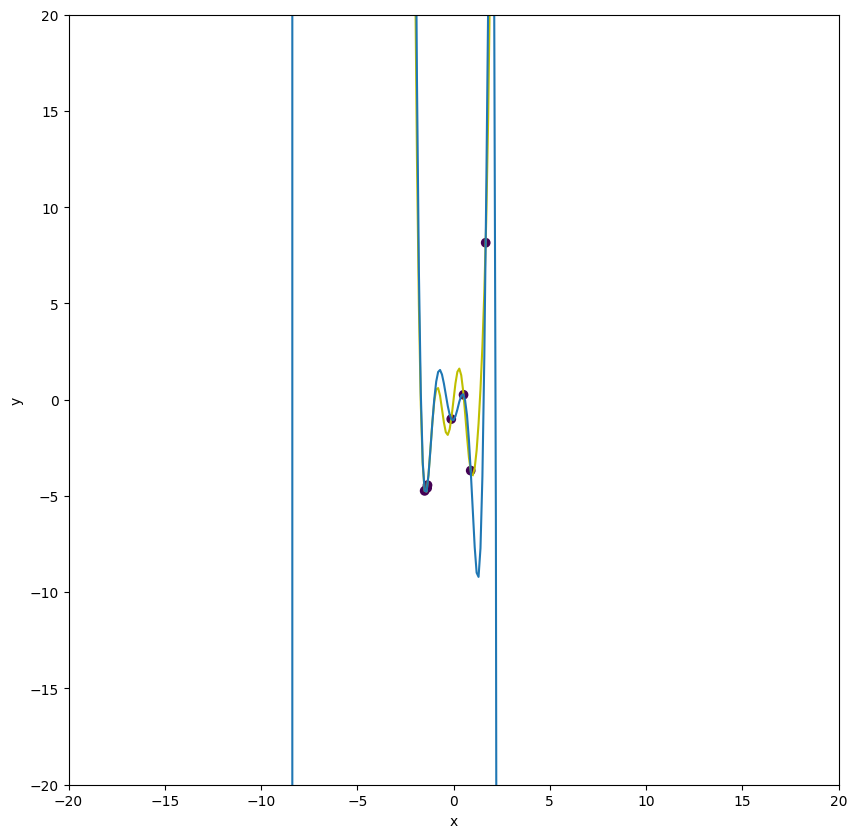

(12, 12)
(12, 1)


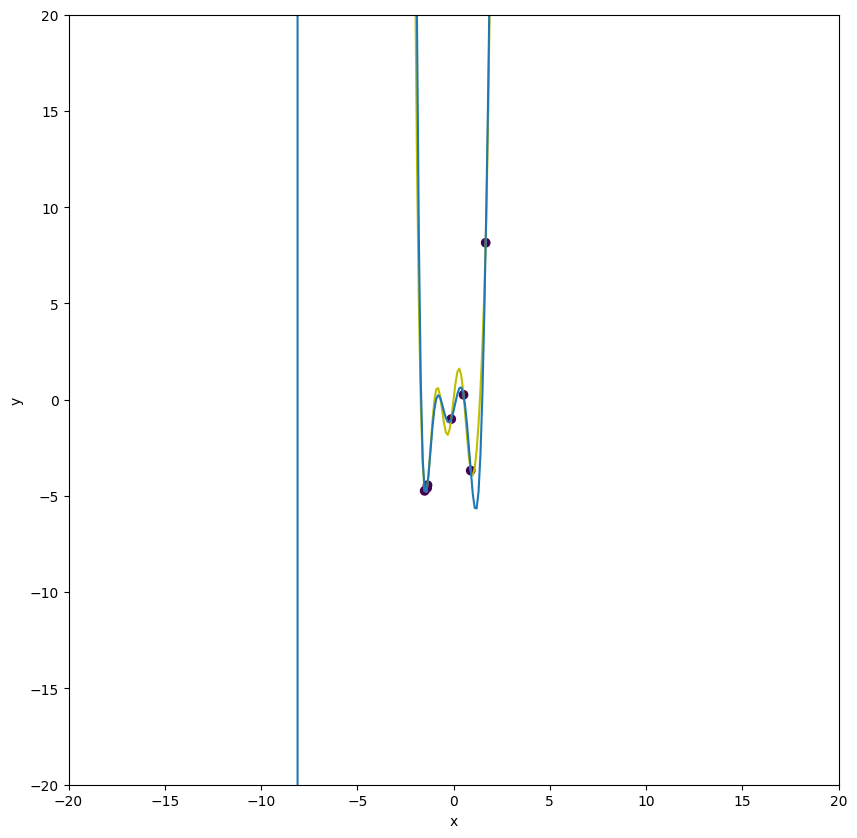

' minimum value found: [np.float64(-4.734735326303242)]'

In [12]:
FP.iterativeMinimize2DExample2()

<h2>Exploration vs. Exploitation</h2>

It is important to note that the functions alternate between exploring a space, and exploiting current knowledge. Odd functions will always approach negative infinity amongst their end behaviors. Their global minima (defined as where the function intersects the x-axis to prevent numbers from blowing up) are often faraway from where the function is most hilly. This is an exhibition of exploration behavior. On the other hand, even functions are concave, so their minima tend to fall into the hills and valleys of the loss function. They most often exploit knowledge to flesh out the loss function's complicated landscape. 

Overall, the odd and even functions alternate between exploring the loss function and exploiting it. Both of them serve to create better approximations of the function over time, but the way in which they accomplish this is different. 

<h2>Generalization of Derivative Matrix to Multivariate Polynomial Vector Space</h2>

The polynomial vector space is quite handy because it allows for the representation of polynomials as vectors, where each row of a vector represents a coefficient of the polynomial. $f(x)= x^2 +6x +9$ becomes $ B = \begin{bmatrix} 1 \\ 6 \\ 9 \end{bmatrix}$. One can then define a matrix that diffrentiates this polynomial vector. Generalizing this notion to multivariable polynomials followed quite naturally, because my code deals with coefficient matrices and returns coefficient vectors. When back propogating, I simply need to input the coefficient vector for my interpolating polynomial yielded from `find_equation` into `diffrentiate` in order to obtain a new matrix that contains all of the derivatives and partial derivatives of my original vector. 

In [13]:
FP.diffrentiate(np.array([[0], [1], [2], [3], [4], [5], [6], [7]]), 1, 3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 2.],
       [0., 0., 0.],
       [1., 0., 4.],
       [2., 4., 0.],
       [3., 5., 6.]])

Differentiating $f(x, y, z) = 0xyz + 1xy + 2xz + 3x + 4yz + 5y + 6z +7$ (following the exponent pattern outlined in Diving into the Math- How Many Points) yields the partials
$$\frac{\partial f}{\partial x} = 1y + 2z + 3 = 0xyz + 0xy + 0xz + 0x + 0yz + 1y + 2z + 3$$
$$\frac{\partial f}{\partial y} = 1x + 4z + 5 = 0xyz + 0xy + 0xz + 1x + 0yz + 0y + 4z + 5$$ 
$$\frac{\partial f}{\partial z} = 2x + 4y + 6 = 0xyz + 0xy + 0xz + 2x + 0yz + 4y + 0z + 6$$ 
This format makes it easier to check against the 8x3 vector generated by the code. 


In [14]:
FP.diffrentiate(np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8]]), 2, 2)


array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  0.],
       [ 2.,  6.],
       [ 4.,  4.],
       [ 3.,  0.],
       [ 4., 12.],
       [ 5.,  7.]])

Derivatives of $ f(x, y) = 0x^2y^2 + 1x^2y + 2x^2 + 3xy^2 + 4xy + 5x + 6y^2 + 7y + 8 $